In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("countries_aggregated_csv.csv")
data

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
134451,2021-12-03,Zimbabwe,137441,0,4708
134452,2021-12-04,Zimbabwe,138523,0,4709
134453,2021-12-05,Zimbabwe,139046,0,4710
134454,2021-12-06,Zimbabwe,139046,0,4710


In [3]:
population=pd.read_csv('population_by_country_2020.csv')
population

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,39074280,2.33%,886592,60,652860,-62920.0,4.6,18,25%,0.50%
1,Albania,2877239,-0.11%,-3120,105,27400,-14000.0,1.6,36,63%,0.04%
2,Algeria,43984569,1.85%,797990,18,2381740,-10000.0,3.1,29,73%,0.56%
3,American Samoa,55169,-0.22%,-121,276,200,NaN,N.A.,N.A.,88%,0.00%
4,Andorra,77287,0.16%,123,164,470,NaN,N.A.,N.A.,88%,0.00%
...,...,...,...,...,...,...,...,...,...,...,...
230,Wallis & Futuna,11203,-1.69%,-193,80,140,NaN,N.A.,N.A.,0%,0.00%
231,Western Sahara,599769,2.55%,14876,2,266000,5582.0,2.4,28,87%,0.01%
232,Yemen,29935468,2.28%,664042,56,527970,-30000.0,3.8,20,38%,0.38%
233,Zambia,18468257,2.93%,522925,25,743390,-8000.0,4.7,18,45%,0.24%


In [4]:
population=population.drop(population.iloc[:,2:], axis=1)
population=population.rename(columns={'Country (or dependency)':'Country'})
population

,Country,Population (2020)
0,Afghanistan,39074280
1,Albania,2877239
2,Algeria,43984569
3,American Samoa,55169
4,Andorra,77287
...,...,...
230,Wallis & Futuna,11203
231,Western Sahara,599769
232,Yemen,29935468
233,Zambia,18468257


In [5]:
df1=pd.concat([data,population],ignore_index=True)
df1

,Date,Country,Confirmed,Recovered,Deaths,Population (2020)
0,2020-01-22,Afghanistan,0.0,0.0,0.0,NaN
1,2020-01-23,Afghanistan,0.0,0.0,0.0,NaN
2,2020-01-24,Afghanistan,0.0,0.0,0.0,NaN
3,2020-01-25,Afghanistan,0.0,0.0,0.0,NaN
4,2020-01-26,Afghanistan,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...
134686,NaN,Wallis & Futuna,NaN,NaN,NaN,11203.0
134687,NaN,Western Sahara,NaN,NaN,NaN,599769.0
134688,NaN,Yemen,NaN,NaN,NaN,29935468.0
134689,NaN,Zambia,NaN,NaN,NaN,18468257.0


In [6]:
df1.isnull()

,Date,Country,Confirmed,Recovered,Deaths,Population (2020)
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
134686,True,False,True,True,True,False
134687,True,False,True,True,True,False
134688,True,False,True,True,True,False
134689,True,False,True,True,True,False


In [7]:
df2=df1.groupby(['Country']).sum()
df2

,Confirmed,Recovered,Deaths,Population (2020)
Country,,,,
Afghanistan,44232977.0,18289880.0,1899283.0,39074280.0
Albania,49891048.0,22652652.0,883601.0,2877239.0
Algeria,62599013.0,25670233.0,1793020.0,43984569.0
American Samoa,0.0,0.0,0.0,55169.0
Andorra,5264023.0,3085649.0,56864.0,77287.0
...,...,...,...,...
West Bank and Gaza,113537214.0,57608773.0,1209207.0,0.0
Western Sahara,0.0,0.0,0.0,599769.0
Yemen,2544001.0,772497.0,542436.0,29935468.0


In [8]:
df2.isnull().sum()

Confirmed            0
Recovered            0
Deaths               0
Population (2020)    0
dtype: int64

In [9]:
df2.drop(index=df2[df2['Confirmed'] == 0].index,inplace=True)
df2.drop(index=df2[df2['Recovered'] == 0].index,inplace=True)
df2.drop(index=df2[df2['Deaths'] == 0].index,inplace=True)
df2.drop(index=df2[df2['Population (2020)'] == 0].index,inplace=True)
df2.to_csv('df2.csv')
df2=pd.read_csv("df2.csv")
df2

,Country,Confirmed,Recovered,Deaths,Population (2020)
0,Afghanistan,44232977.0,18289880.0,1899283.0,39074280.0
1,Albania,49891048.0,22652652.0,883601.0,2877239.0
2,Algeria,62599013.0,25670233.0,1793020.0,43984569.0
3,Andorra,5264023.0,3085649.0,56864.0,77287.0
4,Angola,14484285.0,5895800.0,363647.0,33032075.0
...,...,...,...,...,...
166,Venezuela,101250358.0,49871349.0,1120898.0,28421581.0
167,Vietnam,98729866.0,1261448.0,2229642.0,97490013.0
168,Yemen,2544001.0,772497.0,542436.0,29935468.0
169,Zambia,49681508.0,21852796.0,814464.0,18468257.0


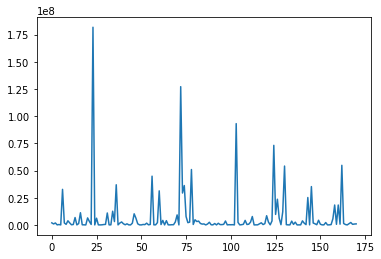

In [10]:
plt.plot(df2['Deaths'])

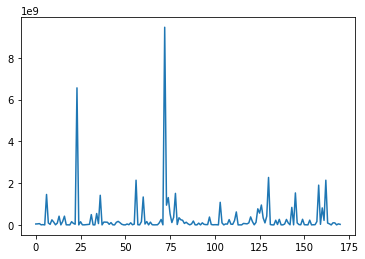

In [11]:
plt.plot(df2['Confirmed'])

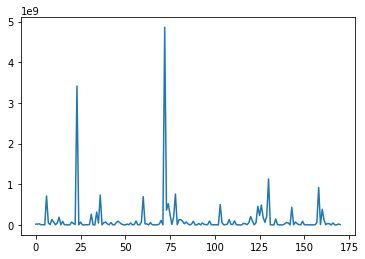

In [12]:
plt.plot(df2['Recovered'])

In [13]:
## Calculate Active Cases,Death Rate,Case Rate and Recovery Rate

df2['Active_Cases']=df2['Confirmed']-df2['Recovered']-df2['Deaths']
df2['Death_Rate']= df2['Confirmed']/df2['Deaths']
df2['Case_Rate']=df2['Population (2020)']/df2['Active_Cases']
df2['Recovery_Rate']=df2['Active_Cases']/df2['Recovered']
df2.head(10)


,Country,Confirmed,Recovered,Deaths,Population (2020),Active_Cases,Death_Rate,Case_Rate,Recovery_Rate
0,Afghanistan,4.423298e+07,18289880.0,1899283.0,39074280.0,24043814.0,23.289303,1.625128,1.314597
1,Albania,4.989105e+07,22652652.0,883601.0,2877239.0,26354795.0,56.463322,0.109173,1.163431
2,Algeria,6.259901e+07,25670233.0,1793020.0,43984569.0,35135760.0,34.912613,1.251846,1.368736
3,Andorra,5.264023e+06,3085649.0,56864.0,77287.0,2121510.0,92.572155,0.036430,0.687541
4,Angola,1.448428e+07,5895800.0,363647.0,33032075.0,8224838.0,39.830619,4.016137,1.395033
5,Antigua and Barbuda,6.114310e+05,191813.0,16677.0,98069.0,402941.0,36.663129,0.243383,2.100697
6,Argentina,1.458330e+09,711610324.0,32677793.0,45267449.0,714042189.0,44.627564,0.063396,1.003417
7,Armenia,9.254983e+07,51634388.0,1797389.0,2964219.0,39118049.0,51.491261,0.075776,0.757597
8,Australia,2.686148e+07,8821094.0,508968.0,25550683.0,17531415.0,52.776357,1.457423,1.987442
9,Austria,2.433671e+08,131744371.0,3802260.0,9015361.0,107820459.0,64.005904,0.083615,0.818407


In [14]:
df2['Deaths']

0      1899283.0
1       883601.0
2      1793020.0
3        56864.0
4       363647.0
         ...    
166    1120898.0
167    2229642.0
168     542436.0
169     814464.0
170     950479.0
Name: Deaths, Length: 171, dtype: float64

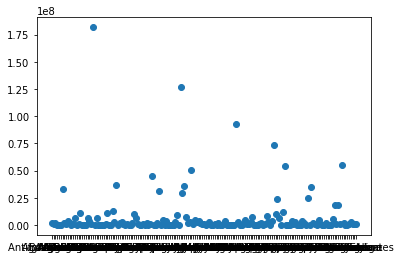

In [15]:
plt.scatter(df2['Country'],df2['Deaths'])

In [16]:
df2.dtypes

Country               object
Confirmed            float64
Recovered            float64
Deaths               float64
Population (2020)    float64
Active_Cases         float64
Death_Rate           float64
Case_Rate            float64
Recovery_Rate        float64
dtype: object

In [17]:
df3=df2.drop(['Confirmed','Recovered','Deaths','Population (2020)','Active_Cases'],axis=1)
df3

,Country,Death_Rate,Case_Rate,Recovery_Rate
0,Afghanistan,23.289303,1.625128,1.314597
1,Albania,56.463322,0.109173,1.163431
2,Algeria,34.912613,1.251846,1.368736
3,Andorra,92.572155,0.036430,0.687541
4,Angola,39.830619,4.016137,1.395033
...,...,...,...,...
166,Venezuela,90.329680,0.565512,1.007755
167,Vietnam,44.280591,1.023638,75.499566
168,Yemen,4.689956,24.356234,1.591033
169,Zambia,60.999023,0.683649,1.236192


In [18]:
df3.describe()

,Death_Rate,Case_Rate,Recovery_Rate
count,171.000000,171.000000,171.000000
mean,90.428142,5.292951,9.930115
std,129.985942,41.763903,54.933330
min,4.689956,0.027095,0.327317
25%,38.117437,0.086798,0.860839
50%,58.551677,0.179674,1.156330
75%,88.146697,1.468791,1.827699
max,1110.173913,537.172474,604.043996


In [19]:
m1=90.428142
df3['DRC']= [1 if x > m1 else 0 for x in df3['Death_Rate']]
m2=5.292951
df3['CRC']= [1 if y > m2 else 0 for y in df3['Case_Rate']]
m3=9.930115
df3['RRC']= [1 if z > m3 else 0 for z in df3['Recovery_Rate']]
df3

,Country,Death_Rate,Case_Rate,Recovery_Rate,DRC,CRC,RRC
0,Afghanistan,23.289303,1.625128,1.314597,0,0,0
1,Albania,56.463322,0.109173,1.163431,0,0,0
2,Algeria,34.912613,1.251846,1.368736,0,0,0
3,Andorra,92.572155,0.036430,0.687541,1,0,0
4,Angola,39.830619,4.016137,1.395033,0,0,0
...,...,...,...,...,...,...,...
166,Venezuela,90.329680,0.565512,1.007755,0,0,0
167,Vietnam,44.280591,1.023638,75.499566,0,0,1
168,Yemen,4.689956,24.356234,1.591033,0,1,0
169,Zambia,60.999023,0.683649,1.236192,0,0,0


In [20]:
df3.head(10)

,Country,Death_Rate,Case_Rate,Recovery_Rate,DRC,CRC,RRC
0,Afghanistan,23.289303,1.625128,1.314597,0,0,0
1,Albania,56.463322,0.109173,1.163431,0,0,0
2,Algeria,34.912613,1.251846,1.368736,0,0,0
3,Andorra,92.572155,0.036430,0.687541,1,0,0
4,Angola,39.830619,4.016137,1.395033,0,0,0
5,Antigua and Barbuda,36.663129,0.243383,2.100697,0,0,0
6,Argentina,44.627564,0.063396,1.003417,0,0,0
7,Armenia,51.491261,0.075776,0.757597,0,0,0
8,Australia,52.776357,1.457423,1.987442,0,0,0
9,Austria,64.005904,0.083615,0.818407,0,0,0


In [21]:
RF=[]
for i in df3.index:
    if df3.loc[i,'CRC']==1:
        RF.append('HR')
    elif (df3.loc[i,'DRC']==1 and df3.loc[i,'CRC']==0  and df3.loc[i,'RRC']==1) or (df3.loc[i,'DRC']==1 and df3.loc[i,'CRC']==0  and df3.loc[i,'RRC']==0) or (df3.loc[i,'DRC']==0 and df3.loc[i,'CRC']==0 and df3.loc[i,'RRC']==0) :
        RF.append('MR')
    else:
        RF.append('RE')
df3['RF']=RF
df3

,Country,Death_Rate,Case_Rate,Recovery_Rate,DRC,CRC,RRC,RF
0,Afghanistan,23.289303,1.625128,1.314597,0,0,0,MR
1,Albania,56.463322,0.109173,1.163431,0,0,0,MR
2,Algeria,34.912613,1.251846,1.368736,0,0,0,MR
3,Andorra,92.572155,0.036430,0.687541,1,0,0,MR
4,Angola,39.830619,4.016137,1.395033,0,0,0,MR
...,...,...,...,...,...,...,...,...
166,Venezuela,90.329680,0.565512,1.007755,0,0,0,MR
167,Vietnam,44.280591,1.023638,75.499566,0,0,1,RE
168,Yemen,4.689956,24.356234,1.591033,0,1,0,HR
169,Zambia,60.999023,0.683649,1.236192,0,0,0,MR


In [22]:
from sklearn.preprocessing import LabelEncoder
def labelencode(dataset, col):
    Label=LabelEncoder()
    Label.fit(dataset[col])
    return Label.transform(dataset[col])

df3['RF'] = labelencode(df3, 'RF')
df3

,Country,Death_Rate,Case_Rate,Recovery_Rate,DRC,CRC,RRC,RF
0,Afghanistan,23.289303,1.625128,1.314597,0,0,0,1
1,Albania,56.463322,0.109173,1.163431,0,0,0,1
2,Algeria,34.912613,1.251846,1.368736,0,0,0,1
3,Andorra,92.572155,0.036430,0.687541,1,0,0,1
4,Angola,39.830619,4.016137,1.395033,0,0,0,1
...,...,...,...,...,...,...,...,...
166,Venezuela,90.329680,0.565512,1.007755,0,0,0,1
167,Vietnam,44.280591,1.023638,75.499566,0,0,1,2
168,Yemen,4.689956,24.356234,1.591033,0,1,0,0
169,Zambia,60.999023,0.683649,1.236192,0,0,0,1


In [23]:
df4=df3.drop(df3.iloc[:,4:7],axis=1)
df4.drop(['Country'],axis=1,inplace=True)
df4

,Death_Rate,Case_Rate,Recovery_Rate,RF
0,23.289303,1.625128,1.314597,1
1,56.463322,0.109173,1.163431,1
2,34.912613,1.251846,1.368736,1
3,92.572155,0.036430,0.687541,1
4,39.830619,4.016137,1.395033,1
...,...,...,...,...
166,90.329680,0.565512,1.007755,1
167,44.280591,1.023638,75.499566,2
168,4.689956,24.356234,1.591033,0
169,60.999023,0.683649,1.236192,1


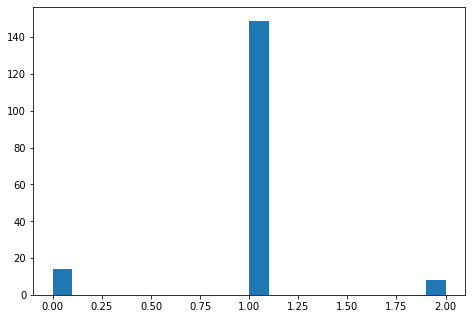

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.hist(df4['RF'],20)
plt.show()

In [25]:
###Train data
from sklearn.model_selection import train_test_split
X=df4.drop('RF',axis=1)
y=df4['RF']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.9,random_state=20)

In [27]:
from sklearn.svm import SVC
from sklearn import metrics
cls=SVC(kernel="linear")
cls.fit(X_train,y_train)

y_pred=cls.predict(X_test)

print("accuracy: ",metrics.accuracy_score(y_test,y_pred))
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)
print(metrics.classification_report(y_test, y_pred))

accuracy:  0.9090909090909091
[[ 11   0   0]
 [  9 127   1]
 [  0   4   2]]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        11
           1       0.97      0.93      0.95       137
           2       0.67      0.33      0.44         6

    accuracy                           0.91       154
   macro avg       0.73      0.75      0.70       154
weighted avg       0.93      0.91      0.91       154



In [28]:
c=int(input('Enter confirmed cases:'))
d=int(input('Enter death cases:'))
rc=int(input('Enter recover cases:'))
p=int(input('Enter population:'))
a=(c-(d+rc))
dr=c/d
cr=p/a
rr=a/rc
print('death rate:',dr)
print('case rate:',cr)
print('recover rate:',rr)
svm=cls.predict([[dr,cr,rr]])
print(svm)

Enter confirmed cases:9595
Enter death cases:5959
Enter recover cases:6995959
Enter population:6596
death rate: 1.6101694915254237
case rate: -0.0009433202670986452
recover rate: -0.9994802713966734
[1]


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
# accuracy on X_test
knn_predictions = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test,knn_predictions)
print (accuracy)
 
cm = metrics.confusion_matrix(y_test, knn_predictions)
print(cm)
print(metrics.classification_report(y_test, knn_predictions))

0.8376623376623377
[[  9   2   0]
 [ 18 118   1]
 [  0   4   2]]
              precision    recall  f1-score   support

           0       0.33      0.82      0.47        11
           1       0.95      0.86      0.90       137
           2       0.67      0.33      0.44         6

    accuracy                           0.84       154
   macro avg       0.65      0.67      0.61       154
weighted avg       0.90      0.84      0.86       154



c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [30]:
print(X_test)

     Death_Rate  Case_Rate  Recovery_Rate
170   28.288527   0.868379       1.954445
44   196.673736   0.164135      10.694828
135   40.840649   1.689168       1.020538
107   67.286085   0.034646       0.924630
62    38.966798   0.078816       5.358243
..          ...        ...            ...
131   79.715817   1.012010       2.375095
25    24.691280   0.089056       1.137876
141   58.735748   0.048773       0.885586
159   51.096546   2.431289       2.157770
6     44.627564   0.063396       1.003417

[154 rows x 3 columns]


In [ ]:
c=int(input('Enter confirmed cases:'))
d=int(input('Enter death cases:'))
rc=int(input('Enter recover cases:'))
p=int(input('Enter population:'))
a=(c-(d+rc))
dr=c/d
cr=p/a
rr=a/rc
print('death rate:',dr)
print('case rate:',cr)
print('recover rate:',rr)
knn1=knn.predict([[dr,cr,rr]])
print(knn1)